# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.head())
print(study_results.head())
# Combine the data into a single dataset
df=mouse_metadata.merge(study_results,on="Mouse ID")
print(df)
# Display the data table for preview
df

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ra

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Checking the number of mice.
len(df['Mouse ID'].unique())



249

In [74]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupmice={"Mouse ID":[], "Timepoint":[], "Number of Entries":[]}
mouse_list=df['Mouse ID'].unique()
for mouse in mouse_list:
    df_mouse=df.loc[(df['Mouse ID']==mouse),:]
    timepoint_list=df_mouse["Timepoint"].value_counts()
    for timepoint in timepoint_list.index:
        if timepoint_list[timepoint]>1:
            dupmice["Mouse ID"].append(mouse)
            dupmice["Timepoint"].append(timepoint)
            dupmice["Number of Entries"].append(timepoint_list[timepoint])
dupmice_df=pd.DataFrame(dupmice)
dupmice_df

,Mouse ID,Timepoint,Number of Entries
0,g989,15,2
1,g989,10,2
2,g989,5,2
3,g989,20,2
4,g989,0,2


In [75]:
# Optional: Get all the data for the duplicate mouse ID. 
print(dupmice_df["Mouse ID"].unique())
print(dupmice_df["Timepoint"].unique())
dupmice_fulldf=df.loc[(df["Mouse ID"]=="g989"),:]
dupmice_fulldf

['g989']
[15 10  5 20  0]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [133]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=df.loc[df['Mouse ID']!="g989",:]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [77]:
# Checking the number of mice in the clean DataFrame.
len(df['Mouse ID'].unique())

248

In [78]:
regiments=df['Drug Regimen'].unique()
regiments

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

df_gp=df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
measure0=df_gp.mean()
measure1=df_gp.median()
measure2=df_gp.var()
measure3=df_gp.std()
measure4=df_gp.sem()

measures=['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
measures_d={}
for measure in measures:
    measures_d.update({measure:globals()[f'measure{measures.index(measure)}']})
df_measures=pd.DataFrame(measures_d)
df_measures

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
df_gp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

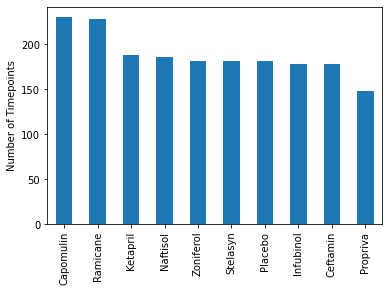

In [81]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#NOTE: THERE WAS A MISTAKE IN THE EXAMPLE. Y AXIS IS NOT THE NUMBER OF MICE, IT IS THE NUMBER OF TIMEPOINTS.
#THE SAME MICE ARE USED REPETITIVELY FOR MULTIPLE TIMEPOINTS.
df_counts=df['Drug Regimen'].value_counts()
df_counts.plot(kind="bar")
plt.ylabel('Number of Timepoints')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

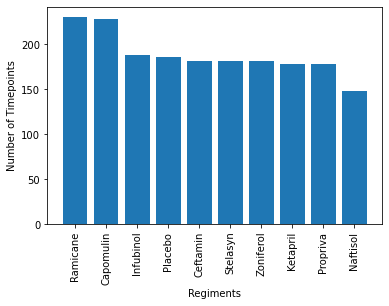

In [82]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(regiments, df_counts)
plt.ylabel('Number of Timepoints')
plt.xlabel('Regiments')
plt.xticks(rotation=90)

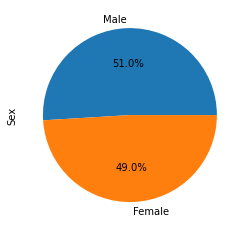

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df_sexcounts=df['Sex'].value_counts()
df_sexcounts.plot(kind='pie', autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

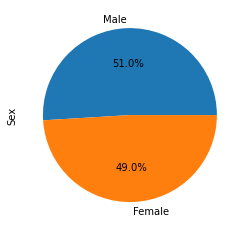

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df_sexcounts,labels=['Male','Female'],autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [134]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df=df.loc[(df['Drug Regimen']=="Capomulin")|
          (df['Drug Regimen']=="Ramicane")|
          (df['Drug Regimen']=="Infubinol")|
          (df['Drug Regimen']=="Ceftamin"),:]
TP_gp=df.groupby('Mouse ID')['Timepoint']
Last_TP=TP_gp.max()
Last_TP=pd.DataFrame(Last_TP)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Last_TP=Last_TP.merge(df, on=['Mouse ID','Timepoint'], how='left')
Last_TP=Last_TP.set_index("Mouse ID")
Last_TP

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a275,45,Ceftamin,Female,20,28,62.999356,3
a411,45,Ramicane,Male,3,22,38.407618,1
a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...
y769,45,Ceftamin,Female,6,27,68.594745,4
y793,45,Capomulin,Male,17,17,31.896238,2
y865,45,Ceftamin,Male,23,26,64.729837,3


In [135]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_outliers={}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    subset=Last_TP.loc[(Last_TP['Drug Regimen']==drug),:]
    quartiles=subset['Tumor Volume (mm3)'].quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_outliers[drug] = subset.loc[(subset['Tumor Volume (mm3)'] < lower_bound) |
                                      (subset['Tumor Volume (mm3)'] > upper_bound),'Tumor Volume (mm3)']
tumor_outliers=pd.DataFrame(tumor_outliers)
tumor_outliers
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Capomulin,Ramicane,Infubinol,Ceftamin
c326,NaN,NaN,36.321346,NaN


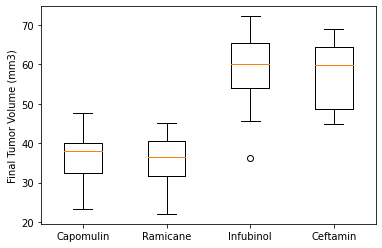

In [136]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drugs=['Capomulin','Ramicane','Infubinol','Ceftamin']
TumVol=[Last_TP.loc[(Last_TP['Drug Regimen']==drug),'Tumor Volume (mm3)'] for drug in drugs] 
TumVol
plt.boxplot(TumVol, labels=drugs)
Plot1=plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

Please input mouse ID. Options are ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157'].l509


<function matplotlib.pyplot.show(*args, **kw)>

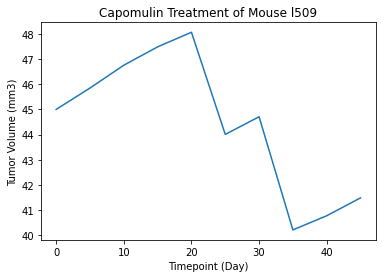

In [137]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin=df.loc[(df['Drug Regimen']=='Capomulin'),:]
mouseIDs=capomulin['Mouse ID'].unique()
mouse=input(f'Please input mouse ID. Options are {mouseIDs}.')
mouse_df=df.loc[(df['Mouse ID']==mouse),:]
plt.plot(mouse_df['Timepoint'],mouse_df['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (Day)")
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {mouse}')
plt.show

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


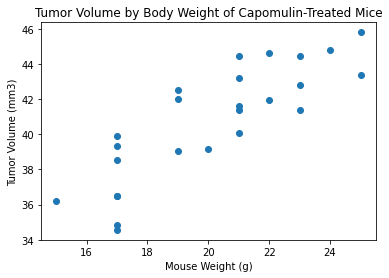

In [138]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
print(capomulin.columns)
capomulin_gp=capomulin.groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']]
averages=capomulin_gp.mean()
x_values=averages['Weight (g)']
y_values=averages['Tumor Volume (mm3)']
Plot1=plt.scatter(x_values,y_values)
Plot1=plt.xlabel("Mouse Weight (g)")
Plot1=plt.ylabel('Tumor Volume (mm3)')
Plot1=plt.title(f'Tumor Volume by Body Weight of Capomulin-Treated Mice')
plt.show()

## Correlation and Regression

The r-squared (correlation coefficient) is: 0.7088568047708717


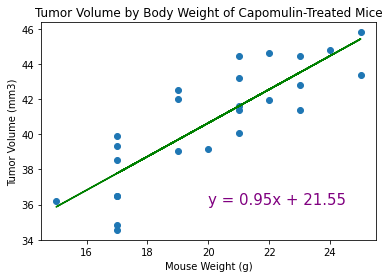

In [140]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x_values,y_values)
plt.xlabel("Mouse Weight (g)")
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume by Body Weight of Capomulin-Treated Mice')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, color='green')
plt.annotate(line_eq,(20,36),fontsize=15,color="purple")
print(f"The r-squared (correlation coefficient) is: {rvalue**2}")
plt.show()